In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

np.random.seed(42)

In [2]:
import os

In [3]:
os.chdir('/Users/mr54725/Documents/repos/INF')

In [4]:
f = np.load('output/heart_results2.npz')
orig_results = f['orig_results']
flipped_results = f['flipped_results']
fixed_influence_loo_results = f['fixed_influence_loo_results']
fixed_loss_results = f['fixed_loss_results']
fixed_random_results = f['fixed_random_results']

In [9]:
f = np.load('output/heart_results.npz')
orig_results = f['orig_results']
flipped_results = f['flipped_results']
fixed_influence_loo_results = f['fixed_influence_loo_results']
fixed_loss_results = f['fixed_loss_results']
fixed_random_results = f['fixed_random_results']

In [10]:
f['orig_results']

array([ 0.40642902,  0.8       ])

Fraction of flips: 0.1


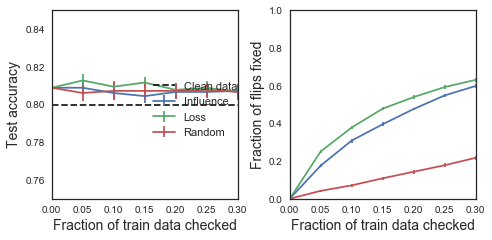

In [15]:
sns.set_style('white')
fontsize=14

x = np.arange(0, 0.35, 0.05)
metric_idx = 0

flip_mean = np.mean(flipped_results, axis=1)
flip_error = np.std(flipped_results, axis=1) / np.sqrt(flipped_results.shape[1])

fig, axs = plt.subplots(1, 2, figsize=(7,3.5))

flip_idx = 1
print("Fraction of flips: %s" % ((flip_idx + 1) * 0.05))
num_train_examples = 267
num_flips = int(num_train_examples / 20) * (flip_idx + 1)  

for ax, metric_idx in zip(axs, [2, 0]):
    for results, label in [
        (fixed_influence_loo_results, 'Influence'),
        (fixed_loss_results, 'Loss'), 
        (fixed_random_results, 'Random')]:
        mean = np.mean(results, axis=2)[flip_idx, :, metric_idx]
        error = np.std(results, axis=2)[flip_idx, :, metric_idx] / np.sqrt(results.shape[2])
        mean = np.insert(mean, 0, flip_mean[flip_idx, metric_idx]) 
        error = np.insert(error, 0, flip_error[flip_idx, metric_idx])

        if metric_idx == 0:
            mean /= num_flips
            error /= num_flips
            
        ax.errorbar(
            x, 
            mean,
            error,
            label=label)
        ax.set_xlim((0, 0.30))
        ax.set_xticks(x)
        ax.set_xlabel('Fraction of train data checked', fontsize=fontsize)

    if metric_idx > 0:
        ax.plot(
            x, 
            [orig_results[metric_idx - 1]] * len(x),
            '--',
            color='k',
            label='Clean data')
        ax.legend(loc=(0.52,0.30), fontsize=fontsize-3)          
        ax.set_ylim((0.75, 0.85))
        ax.set_ylabel('Test accuracy', fontsize=fontsize)

    else:
        ax.set_ylim((0, 1))
      
        ax.set_ylabel('Fraction of flips fixed', fontsize=fontsize)

plt.tight_layout()
plt.subplots_adjust(wspace=0.28)
plt.savefig('fig-heart.png')


In [14]:
plt.savefig('fig-heart.png')